# Multiple Linear Regression

It is used to assess relationship between two variables while taking into account the effect of other variables. By taking into account the effect of other variables, we cancel out the effect of these other variables in order to isolate and measure the relationship between the two variables of interest. 

Is an extension of simple linear regression in case dependent variable $Y$ is related to more than one independent variable $X$.

The regression equation become:

$$Y=b\beta_0 + b\beta_1 x_1 + b\beta_2 x_2 + ... + b\beta_p x_p + \epsilon$$

where $E(\epsilon)=0$ and $Var(\epsilon)=\sigma^2$ (normal distribution)


Firstly we test the relation and significance of each individual variable and if there is no significance the variable can be removed.
then we rerun the model fitting until only significant independent varaibles remain. (backward elimination)


Let's chose which relationship between dependent and independent variable we want to analyse an let's take into account also other factors that can affect this relationship.

e.g. Analyse how the car's fuel consumption `mpg` is affected by the car weigth `wt` but also considering the number of cylinders, the transmission type `am` and the number of carburators `carb`.

$cor
[1] -0.8676594

$`R^2`
[1] 0.7528328

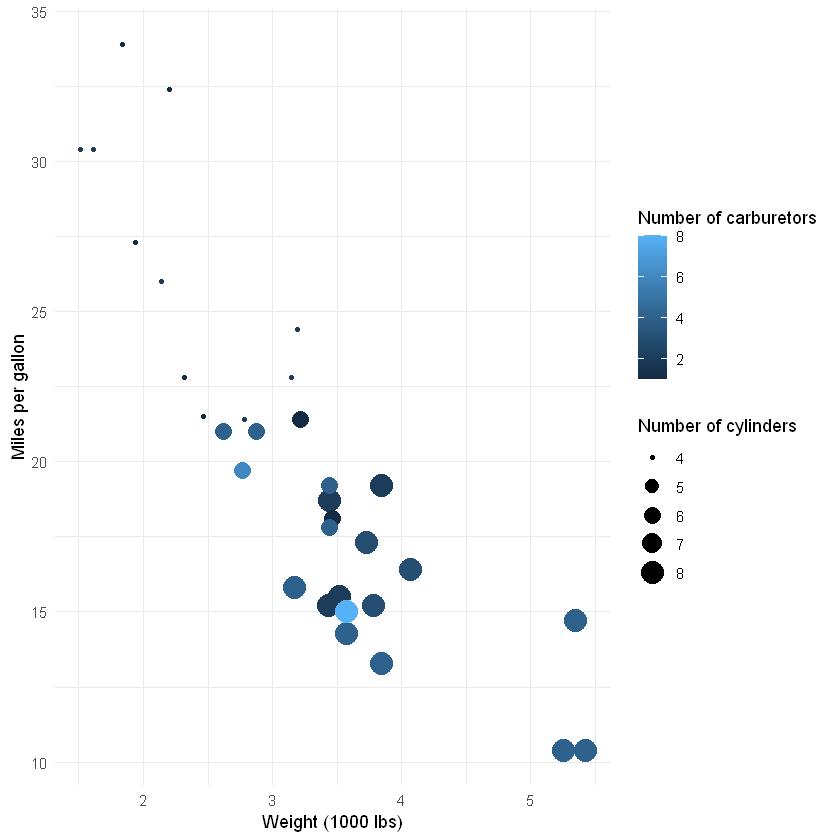

In [1]:
# lets plot firstly the  scatter plot between mpg and wt
library(ggplot2)
data= mtcars
ggplot(data) +
  aes(x = wt, y = mpg, colour = carb, size = cyl) +
  geom_point() +
  scale_color_gradient() +
  labs(
    y = "Miles per gallon",
    x = "Weight (1000 lbs)",
    color = "Number of carburetors",
    size = "Number of cylinders"
  ) +
  theme_minimal()


pearson_cor_coef = cor(data$wt,data$mpg)
list("cor"=pearson_cor_coef,"R^2"=pearson_cor_coef^2)



We can observe:
- a strong and negative  relationship between miles per gallon and weight
- a negative relationship between miles/gallon and number of cylinders
- a negative relationship between miles/gallon and number of carburetors



In [2]:
univ <-lm(formula=mpg ~ wt, data)
summary(univ)


Call:
lm(formula = mpg ~ wt, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


Therefore, we would like to evaluate the relation between the fuel consumption and the weight, but this time by adding `cyl`, `am` and `carb`

In [3]:
# Let's fit to a linear regression model:
data= mtcars
univ <-lm(formula=mpg ~ cyl + wt + am + carb, data)
summary(univ)



Call:
lm(formula = mpg ~ cyl + wt + am + carb, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5451 -1.2184 -0.3739  1.4699  5.3528 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.8503     2.8694  12.843 5.17e-13 ***
cyl          -1.1968     0.4368  -2.740   0.0108 *  
wt           -2.4785     0.9364  -2.647   0.0134 *  
am            1.7801     1.5091   1.180   0.2485    
carb         -0.7480     0.3956  -1.891   0.0694 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.5 on 27 degrees of freedom
Multiple R-squared:  0.8502,	Adjusted R-squared:  0.828 
F-statistic:  38.3 on 4 and 27 DF,  p-value: 9.255e-11


Observing the slope of wt we observe a weaker relationship this time with respect to the previous simple linear regression (-5.34 vs -2.37). In this results, the effect of `wt` on `mpg` was adjusted according to the effect of `cyl`, `am` and `carb`.



In this table of parameter estimates, we see the number of cylinders `cyl` and weight `wt` provide a great amount of explanatory value in describing `mpg` values. The number of carburetors `carb` has limited value, and the transmission type (`am`: automatic or manual) makes a minimal contribution. The estimated coefficients for cylinders and weight are negative because, intuitively, larger engines and heavier cars will get fewer miles per gallon.


The regression model with fitted parameter values is:

$$mpg = 36.85 − 1.20 cyl − 2.48 wt + 1.78 am − 0.75 carb + error$$ 


we can use this regression model to give a reasonable estimate of avarage miles per gallon of a car from a set of parameters between the ranges -> __Prediction__

### Assessing the validity of linear model
Diagnostic plots for the model can reveal whether or not modelling assumptions are reasonable.

As for simple linear regression, multiple linear regression requires some conditions of application for the model to be usable and the results to be interpretable. These are:

1. Linearity of the relationships between the dependent and independent variables
2. Independence of the observations
3. Normality of the residuals
4. Homoscedasticity of the residuals
5. No influential points (outliers)
6. No multicollinearity

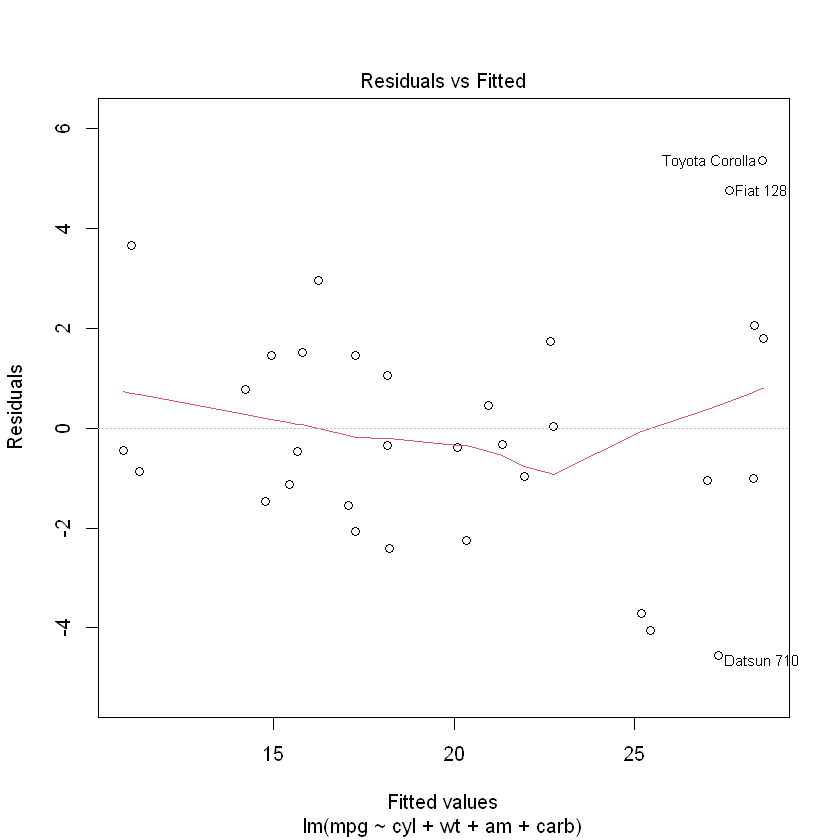

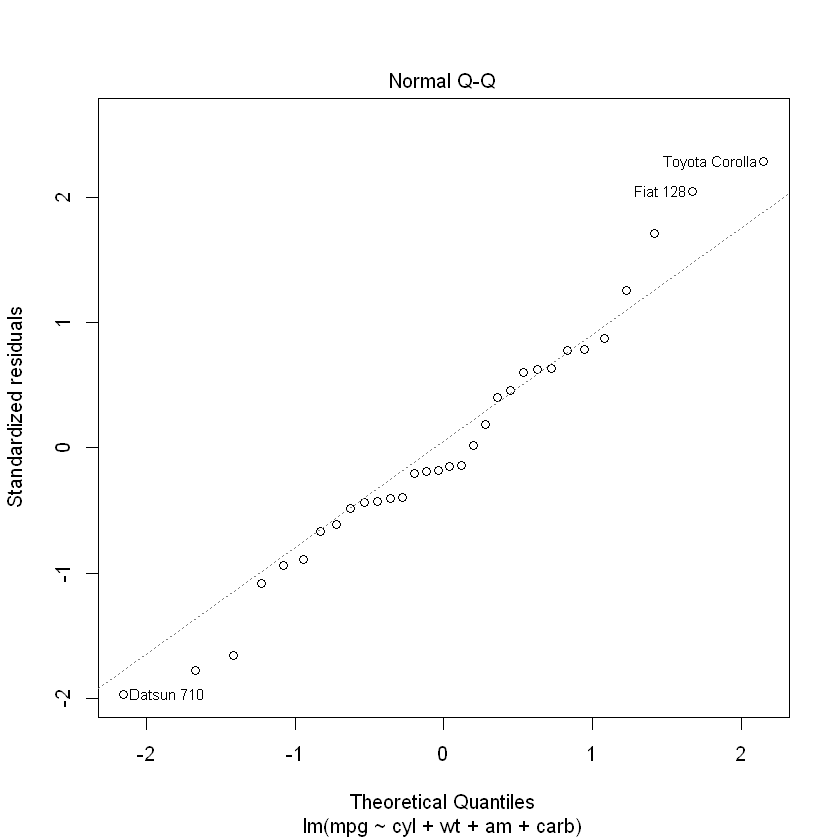

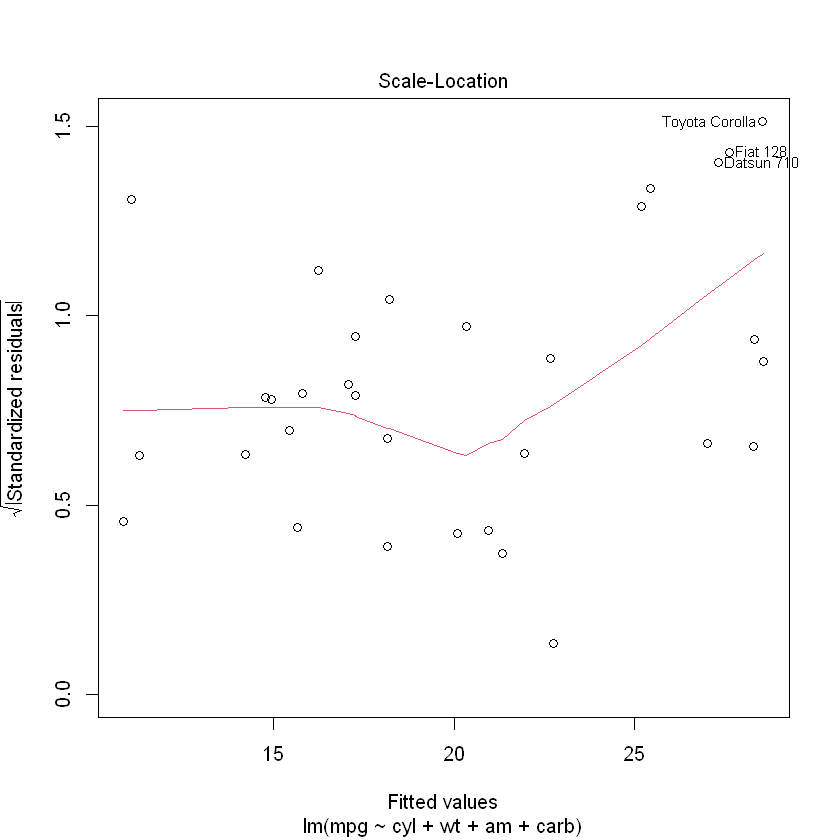

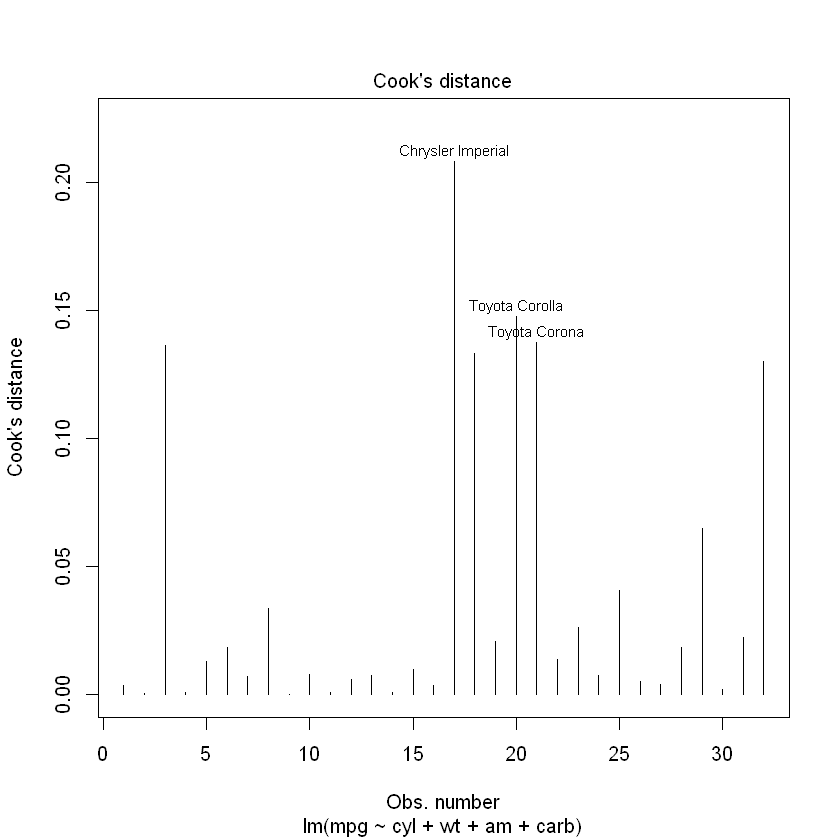

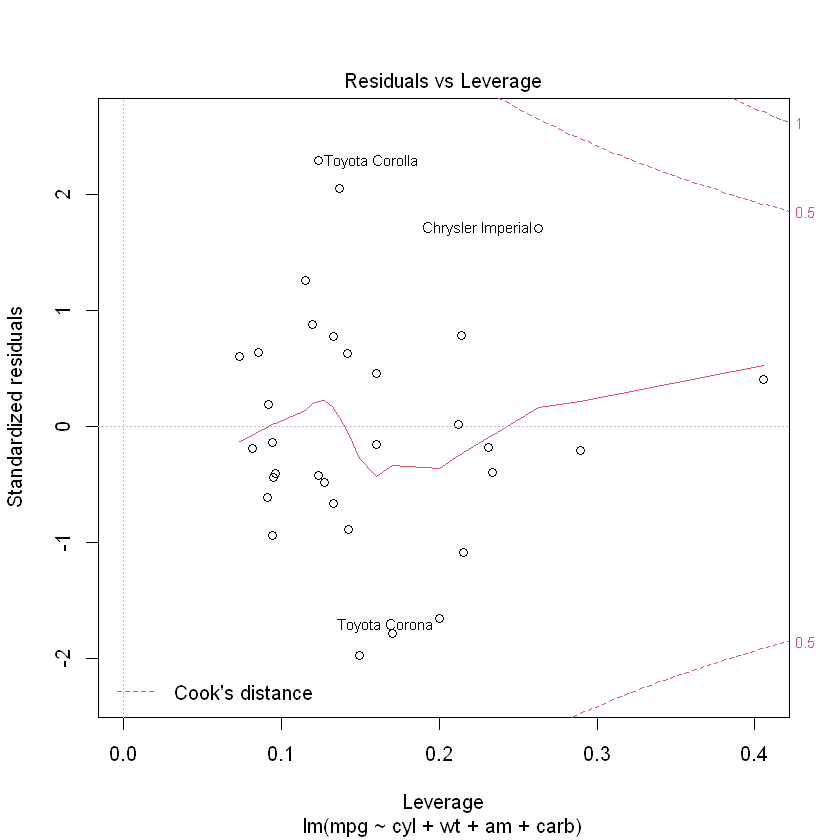

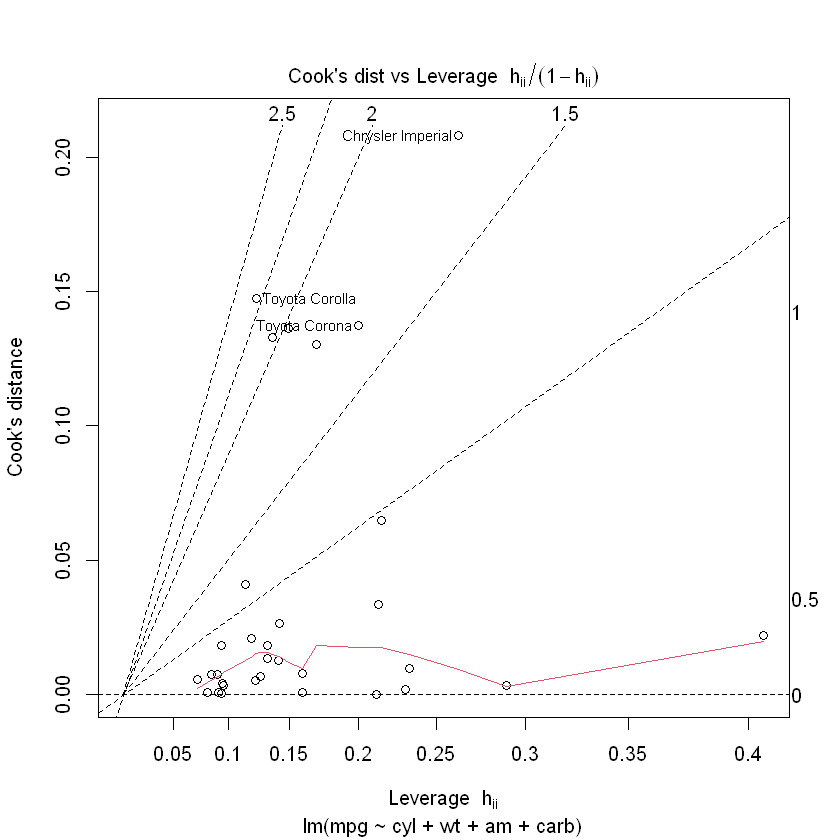

In [4]:
plot(univ, which=1:6)

1. linearity (Residulas vs fitted) is not perfect—a variable could be removed/added or a transformation could be applied to improve linearity
2.
3. Normality of the residuals (QQ plots) is also not perfect but it still seems acceptable
4. Homogeneity of variance (Scale-location) is almost respected
5. There is no influential points (Resiuals vs Leverage)
6. ??


When the conditions of application are met, the model is valid.


### Predictions

Suppose we want to predict the miles/gallon for a car with a manual transmission, weighting 3000 lbs, has 8 cylinders, 4 carburetors and which drives a quarter of a mile (qsec) in 18 seconds:

In [5]:


# confidence interval for new data
predict(univ,
  new = data.frame(cyl = 8, wt = 3, carb= 4, qsec = 18, am = 1),
  interval = "confidence",
  level = .95
)

# prediction interval for new data
predict(univ,
  new = data.frame(cyl = 8, wt = 3, carb= 4, qsec = 18, am = 1),
  interval = "prediction",
  level = .95
)


,fit,lwr,upr
1,18.62856,16.22023,21.03689


,fit,lwr,upr
1,18.62856,12.96237,24.29475


The difference between the confidence and prediction interval is that:

- a confidence interval gives the predicted value for the mean of Y  for a new observation, whereas
- a prediction interval gives the predicted value for an individual Y  for a new observation.

Based on our model, it is expected that this car will drive 18.62 miles with a gallon.

<div class="alert alert-block alert-warning">
<b>Exercize:</b> Perform linear regression analysis on the previous dataset using generalize linear model (glm() and aov()).
</div>

In [6]:
univ.mpg <- aov(mpg ~ cyl + disp + am + carb , data = mtcars)
summary(univ.mpg)
univ.hp <- aov( hp ~ cyl + drat + am + gear + carb, data = mtcars)
summary(univ.hp)
univ.wt <- aov( wt ~ cyl + disp + drat + am + carb, data = mtcars)
summary(univ.wt)
univ.qsec <- aov( qsec ~ cyl + disp + drat + vs + am + gear, data = mtcars)
summary(univ.qsec)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          1  817.7   817.7 118.037 2.33e-11 ***
disp         1   37.6    37.6   5.427  0.02756 *  
am           1   18.7    18.7   2.693  0.11236    
carb         1   65.0    65.0   9.388  0.00491 ** 
Residuals   27  187.0     6.9                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          1 100984  100984 109.558 8.13e-11 ***
drat         1   5122    5122   5.557  0.02621 *  
am           1   3014    3014   3.270  0.08213 .  
gear         1   7477    7477   8.111  0.00848 ** 
carb         1   5164    5164   5.603  0.02566 *  
Residuals   26  23965     922                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          1 18.172  18.172 142.348 4.76e-12 ***
disp         1  5.284   5.284  41.392 8.12e-07 ***
drat         1  0.478   0.478   3.748  0.06381 .  
am           1  0.799   0.799   6.257  0.01900 *  
carb         1  1.626   1.626  12.736  0.00142 ** 
Residuals   26  3.319   0.128                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          1  34.60   34.60  45.168 4.82e-07 ***
disp         1   5.27    5.27   6.882 0.014624 *  
drat         1  16.33   16.33  21.321 0.000100 ***
vs           1  10.82   10.82  14.120 0.000921 ***
am           1  10.64   10.64  13.893 0.000995 ***
gear         1   2.17    2.17   2.827 0.105142    
Residuals   25  19.15    0.77                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The residuals from the four separate regressions can be captured and combined into a single data.frame:

In [7]:
car.res <- cbind( univ.mpg$residuals, univ.hp$residuals,
+ univ.wt$residuals, univ.qsec$residuals)

colnames(car.res)<- c("mpg_res", "hp_res", "wt_res", "qsec_res")
car.res <- data.frame(car.res)

In [8]:
print(car.res, digits=2)

                    mpg_res  hp_res  wt_res qsec_res
Mazda RX4           -1.2058 -52.749  0.0626   0.1024
Mazda RX4 Wag       -1.2058 -52.749  0.3176   0.6624
Datsun 710          -5.2311  26.952  0.2200  -0.3860
Hornet 4 Drive       0.9776   2.005 -0.2721  -0.3505
Hornet Sportabout    2.6172  -2.006 -0.4413  -0.1633
Valiant             -2.9153  -4.267  0.1084   0.3390
Duster 360           0.6013  40.623 -0.6863  -1.3216
Merc 240D            1.8552 -15.330 -0.0526  -0.4685
Merc 230             0.1491  18.585  0.0072   2.5194
Merc 280             0.7295 -36.510  0.1899  -0.4940
Merc 280C           -0.6705 -36.510  0.1899   0.1060
Merc 450SE          -0.0037 -11.129  0.5329   0.2525
Merc 450SL           0.8963 -11.129  0.1929   0.4525
Merc 450SLC         -1.2037 -11.129  0.2429   0.8525
Cadillac Fleetwood  -1.2862  -0.491  0.1742   0.6308
Lincoln Continental -1.5018   9.788  0.4465   0.5054
Chrysler Imperial    2.4388  25.702  0.5613   0.2041
Fiat 128             3.8424   0.867  0.3556   

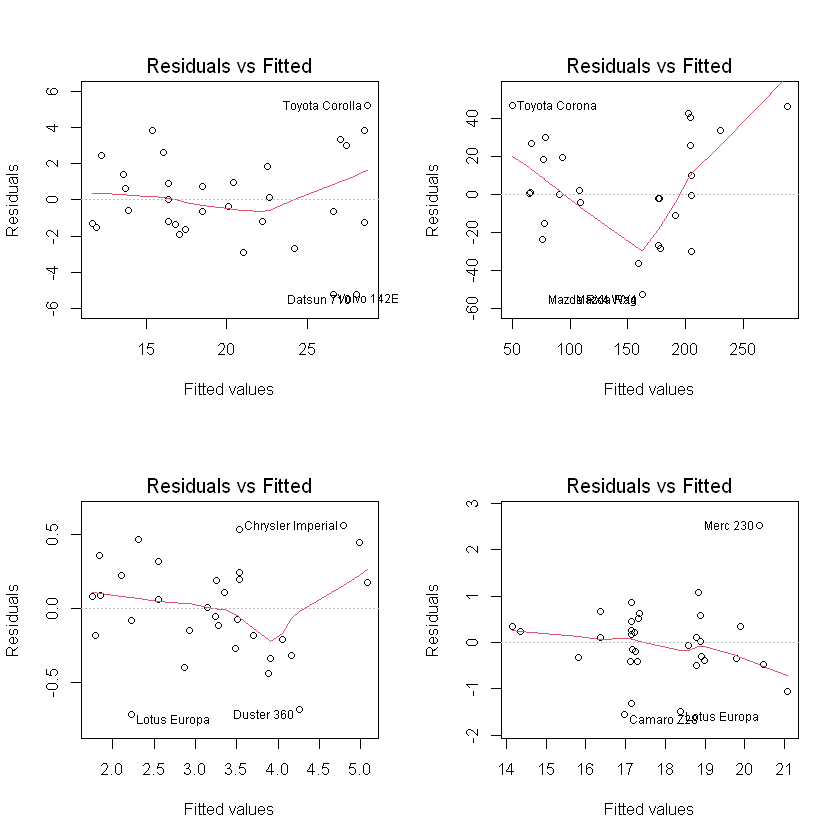

In [9]:
windows()
layout(matrix(1:4, nrow=2, byrow=T))
plot(univ.mpg, which=1) 
plot(univ.hp, which=1) 
plot(univ.wt, which=1) 
plot(univ.qsec, which=1) 

Observe the car's models!

A multivariate examination of these residuals begins with the matrix scatterplot


Caricamento pacchetto: 'psych'


I seguenti oggetti sono mascherati da 'package:ggplot2':

    %+%, alpha




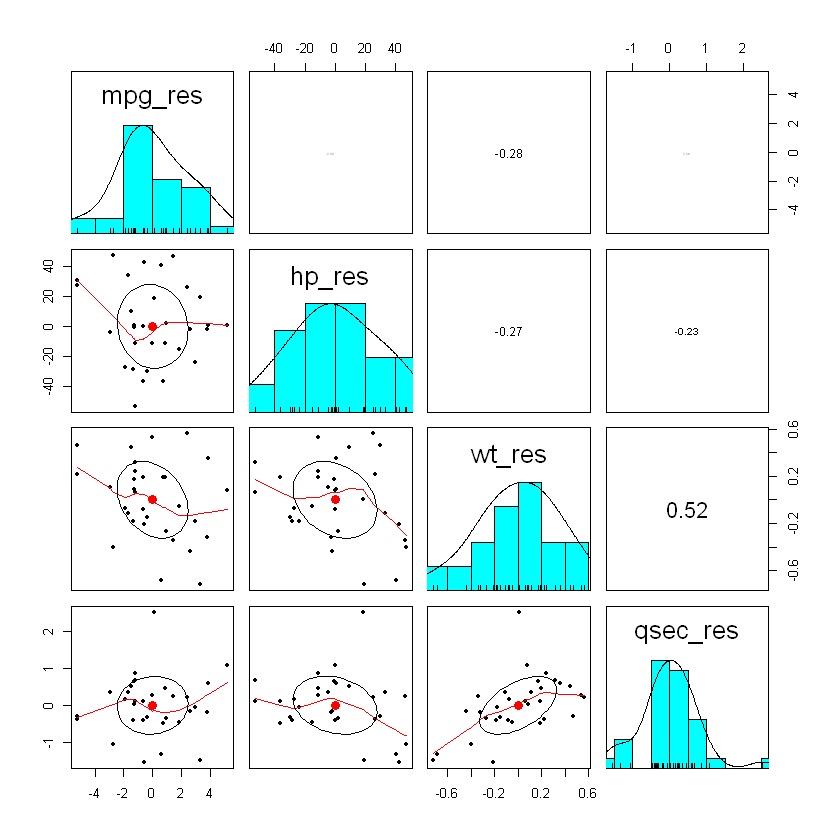

In [10]:
library(psych)
pairs.panels(car.res, scale=TRUE)

We observe that there is no strong correlation between residuals. (see the 0.52 as maximum)

Let's plot the [QQ plot](#QQ) if the Mahalanobis distances for the four-dimesional residuals and lets observe the outliers. We can omit the single observation with the largest Mahalnobis distance.

[1] "Merc 230"


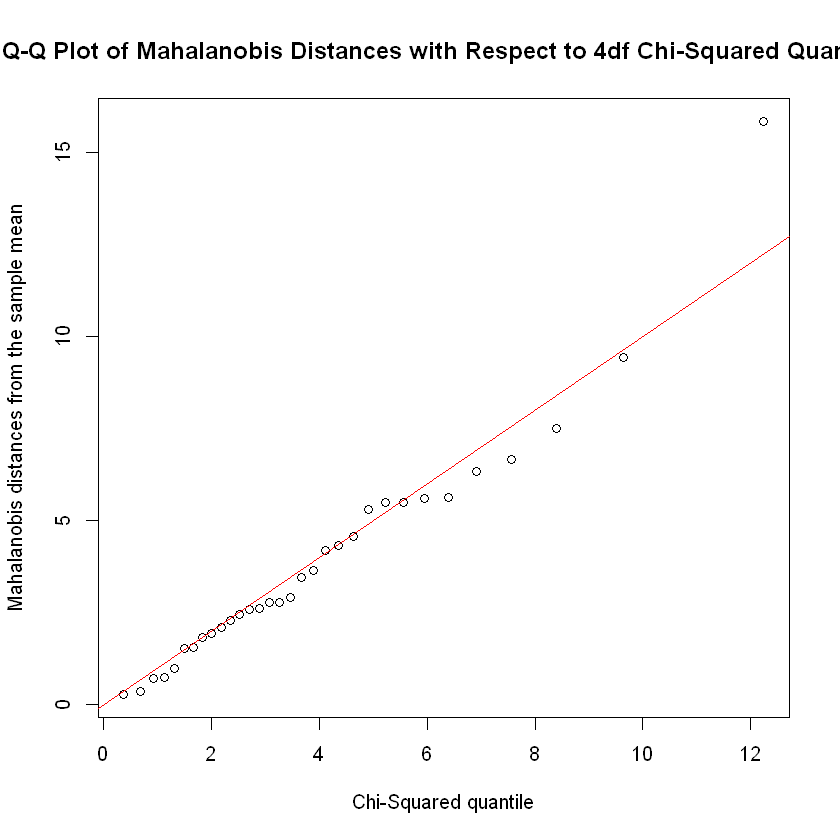

In [11]:
mah<-mahalanobis(car.res, colMeans(car.res), var(car.res))

outliers= boxplot.stats(mah)$out
outlier_names = rownames(car.res)[which(mah %in% outliers)]
print(outlier_names)
# Plot the Q-Q plot of the Mahalanobis distances with respect to the 4-degree-of-freedom chi-squared quantile
qqplot(qchisq(p = ppoints(length(mah)), df = 4),mah, main = "Q-Q Plot of Mahalanobis Distances with Respect to 4df Chi-Squared Quantile",xlab = "Chi-Squared quantile", ylab ="Mahalanobis distances from the sample mean")
abline(a = 0, b = 1, col = "red")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2801  1.9176  2.8426  3.8750  5.4944 15.8456 

Merc 230 
15.84561


	Shapiro-Wilk normality test

data:  Z
W = 0.83886, p-value = 0.0002403



	Shapiro-Wilk normality test

data:  Z
W = 0.92322, p-value = 0.02877


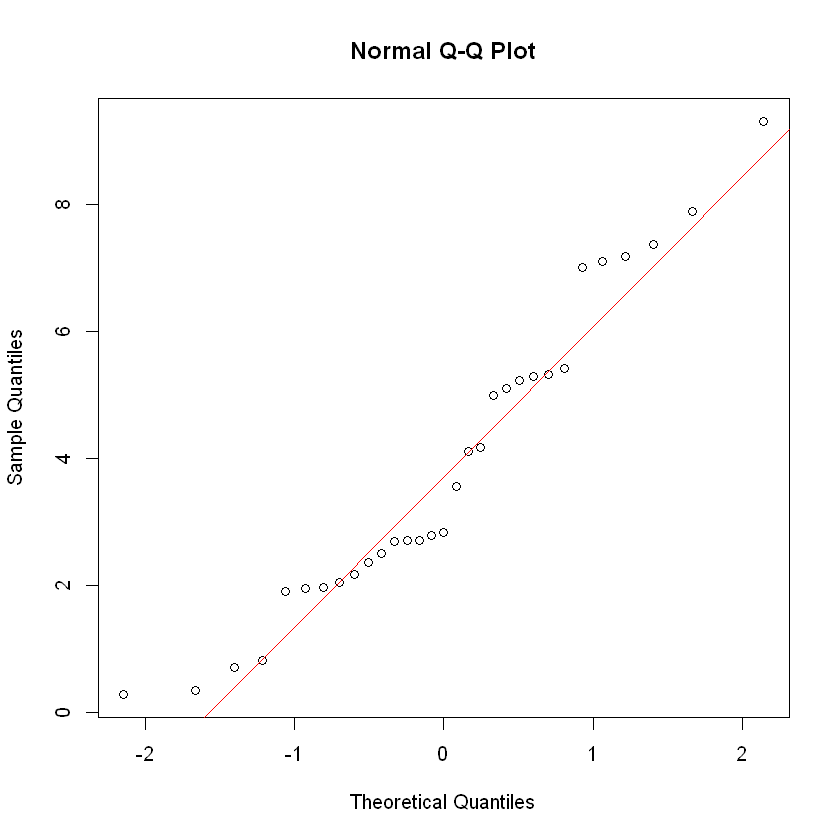

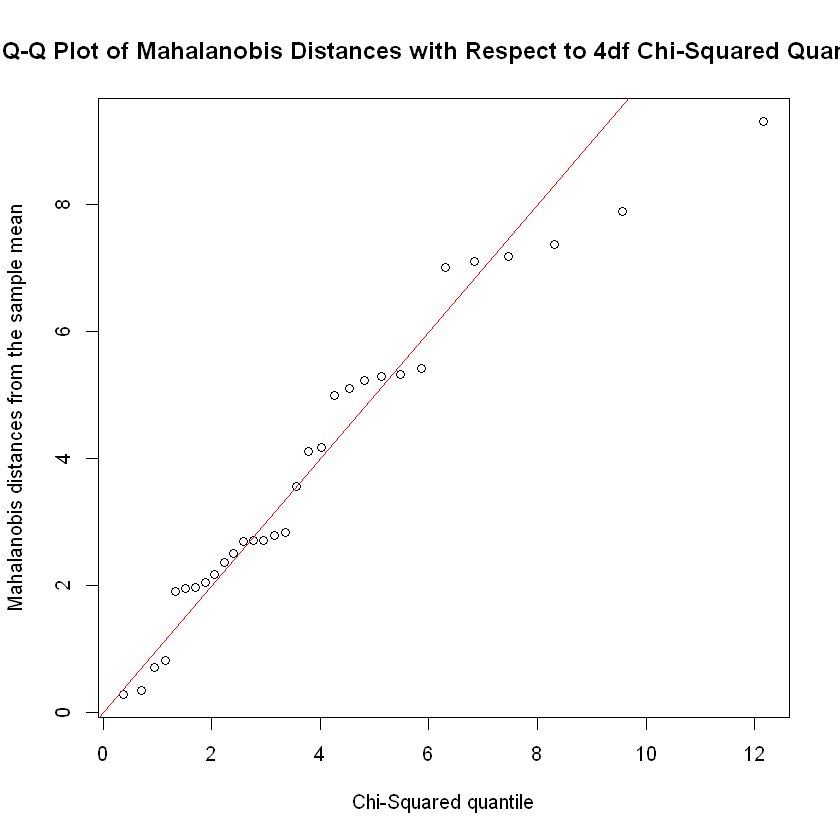

In [12]:
summary(mah)
# Identify the outliers
outliers <- boxplot.stats(mah)$out
outliers

outlier_names <- rownames(mtcars)[mah %in% outliers]

library(mvnormtest)
mshapiro.test( t( car.res))

outi <- match(max(mah),mah) # index of outlier
mshapiro.test( t( car.res[-outi,] ))

mah2 <- mahalanobis(car.res[-outi,], colMeans(car.res[-outi,]), var(car.res[-outi,]))
qqnorm(mah2)
qqline(mah2, col = "red")


# Plot the Q-Q plot of the Mahalanobis distances with respect to the 4-degree-of-freedom chi-squared quantile
qqplot(qchisq(p = ppoints(length(mah2)), df = 4),mah2, main = "Q-Q Plot of Mahalanobis Distances with Respect to 4df Chi-Squared Quantile",xlab = "Chi-Squared quantile", ylab ="Mahalanobis distances from the sample mean")
abline(a = 0, b = 1, col = "red")

The ﬁt to a multivariate normal distribution improves slightly, but is still suspect.

### Principal component analysis

The next step in this multivariable linear regression is to perform a principal components analysis [PCA](#PCA) on these residuals. The object of this examination
is to see if there is any additional information remaining between the four
dependent variables (mpg, hp, wt, qsec) after accounting the linear effects
of the explanatory variables (cyl, disp, drat, vs, am, gear, carb).
The principal components analysis in R is

In [13]:
print(prcomp(car.res, scale = TRUE), digits = 3)

Standard deviations (1, .., p=4):
[1] 1.312 1.061 0.885 0.607

Rotation (n x k) = (4 x 4):
            PC1    PC2   PC3    PC4
mpg_res   0.160 -0.864 0.277  0.388
hp_res    0.426  0.400 0.798  0.146
wt_res   -0.658  0.230 0.106  0.709
qsec_res -0.600 -0.199 0.524 -0.571


We observe that PC1 increase when mpg_res and hp_res are incresed and it is positively correlated. On the other hand, PC1 increase wehn wt_res and qse_res decrease.

A good visualization is given by the biplot.

In the list of ordered standard deviations, we see all four principal components are comparable in magnitude; the largest is just slightly twice the size of the smallest. We interpret the loadings here to mean that the residuals
of hp, wt,and qsec are all highly correlated with each. The mpg residuals are independent of these three.

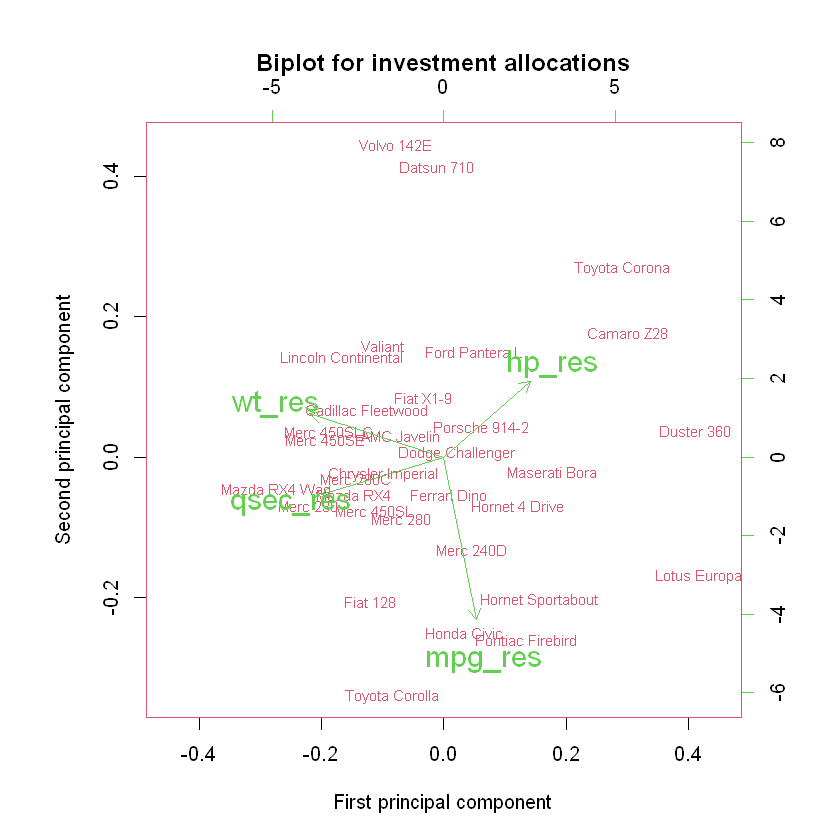

In [17]:
pc <- prcomp(car.res, scale = TRUE)
biplot(pc, col = c(2, 3), cex = c(.75, 1.5),
xlim = c( -.45, .45),
xlab = "First principal component",
ylab = "Second principal component",
main = "Biplot for investment allocations")


Stepwise regression automates the model-building process. We start with a linear model containing all of the explanatory variables and removes one at a time. 
<div class="alert alert-block alert-warning">
<b>Exercize:</b> Perform backward stepwise regression. Does the ﬁnal ﬁtted model from this program coincide with our intuition?
</div>

In [14]:
backward <- stepAIC(univ)
summary(backward)

ERROR: Error in stepAIC(univ): non trovo la funzione "stepAIC"


## Linear Discriminant analysis

In discriminant analysis we try to identify linear combinations of several variables that can be used to distinguish between the groups. 
Discriminant Analysis (DA) is a statistical technique used to identify the relationship between one or more independent variables and a categorical dependent variable.

Let's apply linear discriminant analysis on mtcars dataset. In particular let's use as categorical dependen variable the number of cylinders:

In [ ]:
library(MASS)
# we use the lda() function
lda1 <- lda(cyl ~ mpg + hp + qsec + drat + disp, data = mtcars)
summary(lda1)

Class=unclass(as.factor(mtcars$cyl))
pairs(mtcars[c("mpg", "hp", "qsec", "drat", "disp")], pch = 21, cex=2, bg = c("red", "blue", "green")[unclass(as.factor(mtcars$cyl))])

In [ ]:
loading <- as.matrix(mtcars[c("mpg", "hp", "qsec", "drat", "disp")]) %*% lda1$scaling
plot(loading, col = c("red", "blue", "green")[unclass(as.factor(mtcars$cyl))],
pch = 16, cex = 1.25,
xlab = "First linear discriminator",
ylab = "Second linear discriminator")
for(i in 1:3) #addclass number to each centroid
{
    centx <- mean(loading[unclass(as.factor(mtcars$cyl)) == i,][,1])
    centy <- mean(loading[unclass(as.factor(mtcars$cyl)) == i,][,2])
    text(centx, centy, i, cex = 2)
}

We can observe a clear distinction between the three cylinders cars.

The fitted (posterior) estimated probabilities of group membership can be obtained as predict(ld)$posterior

In [ ]:
pred <- predict(lda1)
summary(pred)
ldahist(data = pred$x[,1], g=mtcars$cyl)


<a id='QQ'></a>


A simple graphical method for checking normality is the quantile–quantile plot or QQ plot.This plot compares the quantiles of the observed values with those of the theoretical distribution, hence the name QQ. The QQ plot displays the sorted, observed values against the values that we would expect to observe had they been sampled from a theoretical normal distribution. If the observed data was sampled from a normal distribution, then we would expect these values to form a nearly straight line.

<a id='PCA'></a>

PCA commonly used for dimensionality reduction by using each data point onto only the first few principal components (most cases first and second dimensions) to obtain lower-dimensional data while keeping as much of the data’s variation as possible.

The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data.